# 5.0 Results

## 5.2 Similar Poses

### Data Set Up

In [2]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [7]:
aug_data = pd.read_csv("data/training/pose_data_aug_res2.csv")
Xa = aug_data.iloc[:,103:]
ya = aug_data['label_encoded'].values
poses_names = aug_data['label'].values

scaler = StandardScaler()
Xa_scaled = scaler.fit_transform(Xa)
Xa

,head_x,head_y,head_z,chest_x,chest_y,chest_z,stomach_x,stomach_y,stomach_z,hip_x,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,0.180861,0.855001,-0.214667,0.263740,0.763737,-0.164132,0.329863,0.656423,-0.082070,0.395987,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
1,0.215390,0.855001,-0.179999,0.288234,0.763737,-0.115841,0.339103,0.656423,-0.023543,0.389973,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
2,0.243374,0.855001,-0.139862,0.303971,0.763737,-0.064030,0.338040,0.656423,0.035699,0.372109,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
3,0.263963,0.855001,-0.095476,0.310471,0.763737,-0.010273,0.326705,0.656423,0.093857,0.342939,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
4,0.276533,0.855001,-0.048189,0.307538,0.763737,0.043796,0.305444,0.656423,0.149163,0.303349,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.215708,0.745179,-0.642808,0.198711,0.701046,-0.523370,0.221355,0.601460,-0.407183,0.243999,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19580,0.324053,0.745179,-0.595585,0.286574,0.701046,-0.480913,0.288699,0.601460,-0.362559,0.290823,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19581,0.422552,0.745179,-0.530266,0.365730,0.701046,-0.423844,0.347270,0.601460,-0.306919,0.328811,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19582,0.508212,0.745179,-0.448834,0.433773,0.701046,-0.353896,0.395290,0.601460,-0.241953,0.356807,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231


In [9]:
from scipy.spatial.distance import pdist, squareform

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(Xa_scaled,ya)
results = pd.DataFrame(X_lda, columns=['lda'])
results['label'] = poses_names
results = results.groupby('label')['lda'].mean().reset_index()

labels = results['label']
distances = pd.DataFrame(np.zeros((len(labels), len(labels))), columns=labels, index=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        distances.iloc[i, j] = abs(results.iloc[i]['lda'] - results.iloc[j]['lda'])

distances

label,armpit-ankle-hold-dart,armpit-ankle-hold-inverted-side-split,armpit-elbow-hold-inverted-straddle,armpit-grip-figurehead,armpit-grip-sign-plus,armpit-grip-straddle,armpit-hip-hold-inverted-straddle,armpit-hold-dakini,armpit-hold-hang-teddy-passe,armpit-hold-pike-teddy-pike,...,two-hand-reverse-grab-open-leg,two-hand-side-hold,two-hand-stronghold-inverted-split,two-handed-full-bracket-split,unicorn-russian-layback-bridge,vertical-duchess-jade-variation,wrist-sit,wrist-sit-back-bend-philly,yogini,yogini-twisted
label,,,,,,,,,,,,,,,,,,,,,
armpit-ankle-hold-dart,0.000000,173.585907,138.519010,13.097703,170.647151,92.491732,139.723014,41.494758,17.045268,78.199624,...,90.378552,149.331470,195.917159,90.159696,207.632539,213.600478,140.042473,109.710593,37.328082,34.389444
armpit-ankle-hold-inverted-side-split,173.585907,0.000000,35.066897,186.683610,2.938756,81.094176,33.862893,132.091149,156.540639,95.386283,...,83.207355,24.254437,22.331252,83.426211,34.046631,40.014571,33.543434,63.875314,136.257825,139.196464
armpit-elbow-hold-inverted-straddle,138.519010,35.066897,0.000000,151.616713,32.128141,46.027278,1.204004,97.024252,121.473742,60.319386,...,48.140458,10.812460,57.398149,48.359314,69.113529,75.081468,1.523463,28.808417,101.190928,104.129566
armpit-grip-figurehead,13.097703,186.683610,151.616713,0.000000,183.744854,105.589435,152.820717,54.592461,30.142971,91.297327,...,103.476256,162.429174,209.014863,103.257399,220.730242,226.698181,153.140176,122.808297,50.425785,47.487147
armpit-grip-sign-plus,170.647151,2.938756,32.128141,183.744854,0.000000,78.155420,30.924137,129.152393,153.601883,92.447527,...,80.268599,21.315681,25.270008,80.487455,36.985387,42.953327,30.604678,60.936558,133.319069,136.257708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vertical-duchess-jade-variation,213.600478,40.014571,75.081468,226.698181,42.953327,121.108747,73.877464,172.105720,196.555210,135.400854,...,123.221926,64.269008,17.683319,123.440782,5.967940,0.000000,73.558006,103.889885,176.272397,179.211035
wrist-sit,140.042473,33.543434,1.523463,153.140176,30.604678,47.550741,0.319459,98.547715,122.997204,61.842849,...,49.663920,9.288998,55.874687,49.882776,67.590066,73.558006,0.000000,30.331879,102.714391,105.653029
wrist-sit-back-bend-philly,109.710593,63.875314,28.808417,122.808297,60.936558,17.218862,30.012420,68.215835,92.665325,31.510970,...,19.332041,39.620877,86.206566,19.550897,97.921945,103.889885,30.331879,0.000000,72.382512,75.321150


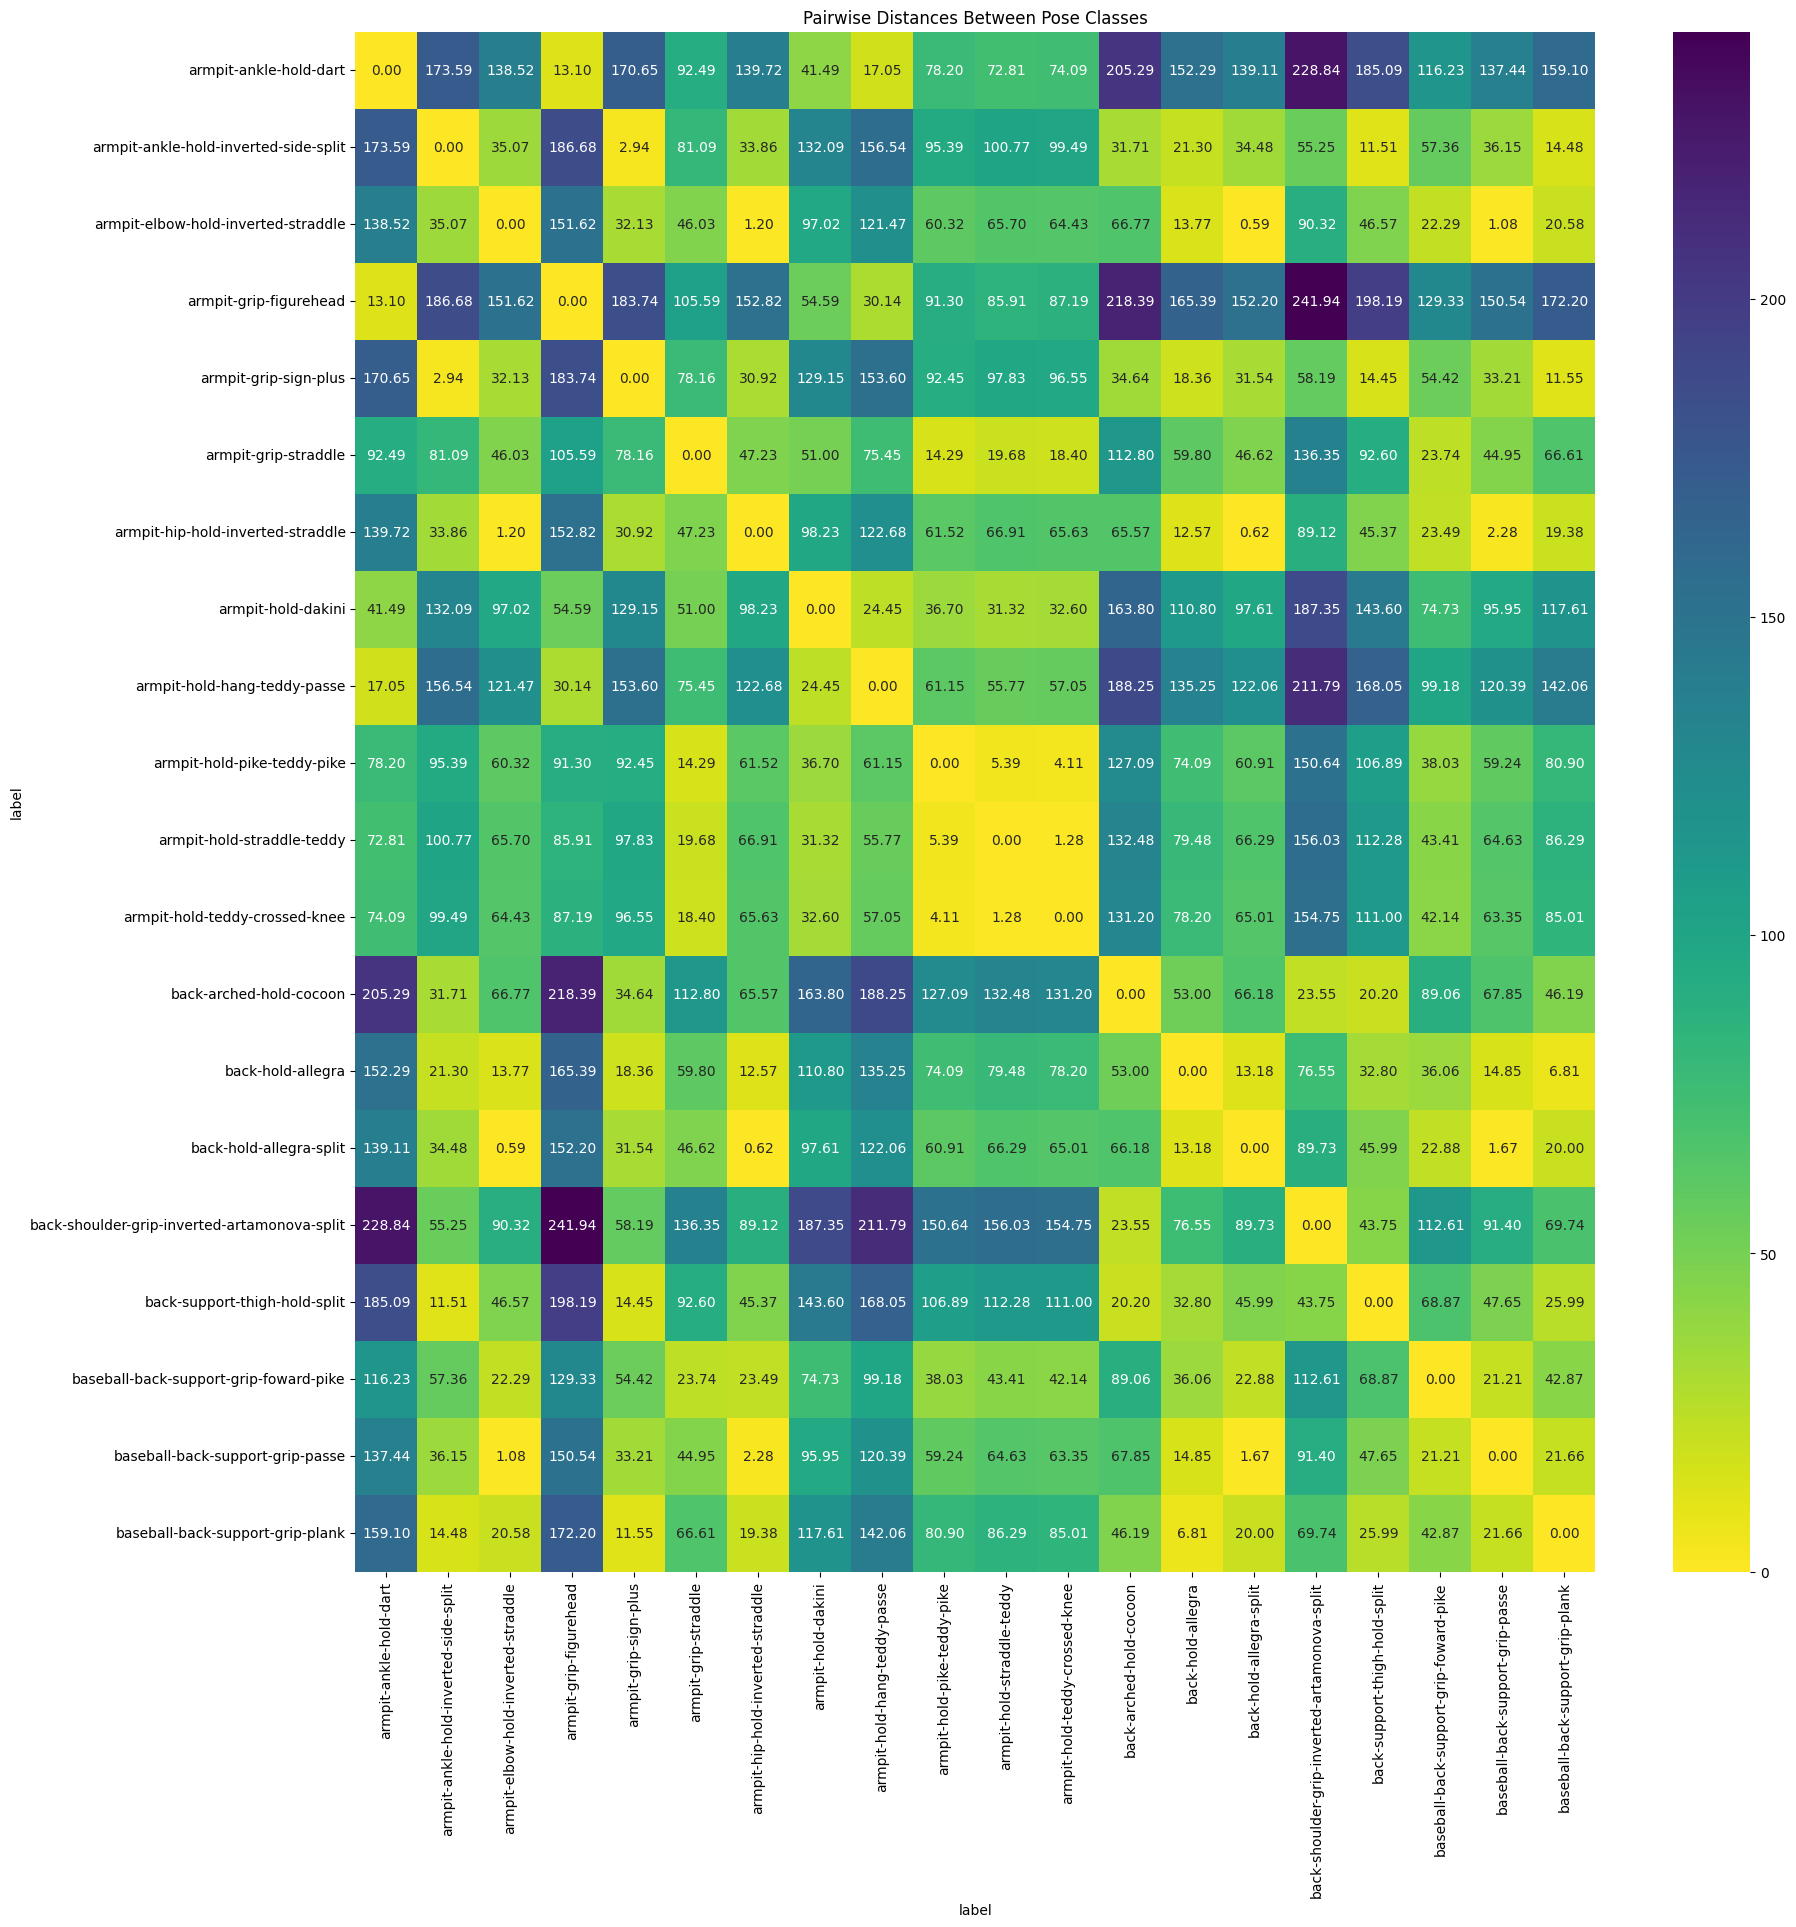

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(distances.iloc[:20,:20], annot=True, fmt=".2f", cmap="viridis_r",
            xticklabels=distances.iloc[:20,:20], yticklabels=distances.iloc[:20,:20])
plt.title('Pairwise Distances Between Pose Classes')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()